# Sentiment Analysis on Twitter Data

It contains the following 6 fields:

1.target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2.ids: The id of the tweet ( 2087)

3.date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4.flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5.user: the user that tweeted (robotickilldozr)

6.text: the text of the tweet (Lyx is cool)


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",header=None,encoding='latin-1')

In [3]:
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
len(df)

1600000

In [5]:
df.columns=['target','ids','date','flag','user','text']

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Preprocessing the tweets

In [7]:
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
wnet=WordNetLemmatizer()
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def preprocessing(tweet):
    
    tweet=tweet.lower()
    tokenized_tweet=word_tokenize(tweet)
    clean_text1=[]
    for word in tokenized_tweet:
        word=re.sub(r'[^\w\s]','',word)
        if word != '':
            clean_text1.append(word)
    clean_text2=[]
    for word in clean_text1:
        if word not in stopwords.words('english'):
            clean_text2.append(word)
    clean_text3=[]
    for word in clean_text2:
        clean_text3.append(wnet.lemmatize(word))
    return ' '.join(clean_text3) 

In [9]:
df= shuffle(df,random_state=101)
df=df[0:100000]

In [10]:
df['target'].value_counts()

4    50011
0    49989
Name: target, dtype: int64

In [11]:
df['text']=df['text'].apply(lambda x:preprocessing(x))

In [12]:
df.head()

,target,ids,date,flag,user,text
250977,0,1983354434,Sun May 31 12:59:58 PDT 2009,NO_QUERY,Yushimi,kardboard yea ugh nt wan na move either textbo...
150064,0,1883616871,Fri May 22 08:50:14 PDT 2009,NO_QUERY,philwade,guess first time everything car broken m1 got ...
710275,0,2257860040,Sat Jun 20 15:00:38 PDT 2009,NO_QUERY,JBnVFCLover786,cousin going america fair know wayyy pppl ugh ...
367641,0,2049251254,Fri Jun 05 16:33:26 PDT 2009,NO_QUERY,ChelseyHart,mitchelmusso ahh first comment youu love xxxan...
575674,0,2211153017,Wed Jun 17 12:30:03 PDT 2009,NO_QUERY,GGirl33,taking care good friend jessica sick going cra...


In [13]:
df=df[['target','text']]

In [14]:
df.head()

,target,text
250977,0,kardboard yea ugh nt wan na move either textbo...
150064,0,guess first time everything car broken m1 got ...
710275,0,cousin going america fair know wayyy pppl ugh ...
367641,0,mitchelmusso ahh first comment youu love xxxan...
575674,0,taking care good friend jessica sick going cra...


In [15]:
count_vect=CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df['text'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words in the tweets.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words in the tweets.
[('nt', 10769), ('day', 6424), ('good', 5669), ('like', 4969), ('http', 4467), ('quot', 4401), ('work', 4303), ('got', 4297), ('today', 4257), ('love', 4234), ('time', 4114), ('going', 4101), ('lol', 3652), ('know', 3455), ('im', 3112), ('really', 3106), ('want', 3058), ('amp', 2972), ('ca', 2833), ('night', 2794)]


In [16]:
count_vect=CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['target']==0]['text'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words in negative tweets.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words in negative tweets.
[('nt', 7368), ('day', 3051), ('work', 2985), ('like', 2556), ('got', 2361), ('today', 2360), ('going', 2129), ('want', 2128), ('miss', 2044), ('time', 2007), ('really', 2003), ('ca', 1948), ('im', 1880), ('good', 1826), ('know', 1765), ('sad', 1696), ('na', 1611), ('quot', 1593), ('feel', 1588), ('http', 1557)]


In [17]:
count_vect=CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['target']==4]['text'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words in positive tweets.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words in positive tweets.
[('good', 3843), ('nt', 3401), ('day', 3373), ('love', 3156), ('http', 2910), ('quot', 2808), ('like', 2413), ('thanks', 2242), ('lol', 2182), ('time', 2107), ('going', 1972), ('got', 1936), ('today', 1897), ('know', 1690), ('new', 1641), ('amp', 1588), ('great', 1541), ('night', 1511), ('haha', 1382), ('morning', 1325)]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [19]:
X=df['text']
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [20]:
def model_results(model):
    preds=model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

# Multinomial NB

In [21]:
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.71      0.81      0.76     12432
           4       0.78      0.68      0.73     12568

    accuracy                           0.74     25000
   macro avg       0.75      0.74      0.74     25000
weighted avg       0.75      0.74      0.74     25000



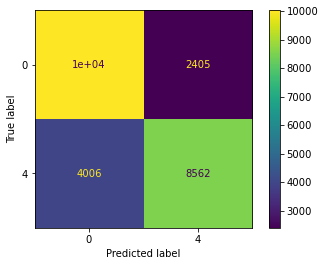

In [22]:
model_results(nb_model)

# SVC 

In [23]:
svc_model=SVC()
svc_model.fit(X_train_tfidf,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     12432
           4       0.76      0.78      0.77     12568

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



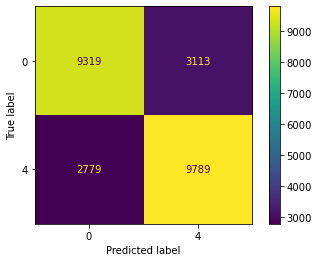

In [24]:
model_results(svc_model)

# Linear SVC

In [25]:
linear_svc_model=LinearSVC()
linear_svc_model.fit(X_train_tfidf,y_train)

LinearSVC()

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     12432
           4       0.75      0.76      0.75     12568

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000



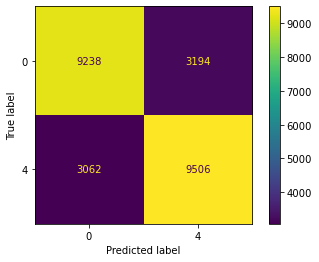

In [26]:
model_results(linear_svc_model)

# Logistic Regression

In [27]:
log_model=LogisticRegression(random_state=101)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(random_state=101)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     12432
           4       0.76      0.78      0.77     12568

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



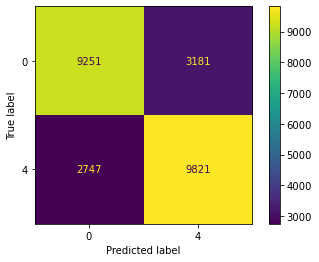

In [28]:
model_results(log_model)

# Random Forest Classifier

In [29]:
rf_model=RandomForestClassifier(random_state=101)
rf_model.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=101)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12432
           4       0.76      0.73      0.74     12568

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000



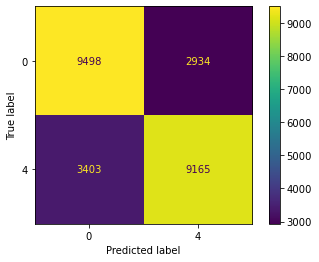

In [30]:
model_results(rf_model)